In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Specify the path to your file
file_path = '/content/drive/My Drive/Colab Notebooks/model.keras'

# Check if the file exists
file_exists = os.path.isfile(file_path)

print(file_exists)  # This will print True if the file exists, False otherwise


True


In [3]:
image_path = 'drive/My Drive/Train/Healthy_train/1.png'

In [4]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (600, 1200))  # Resize to the required input size

    # If the image has 3 channels (RGB), add an alpha channel
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

    image = image.astype('float32') / 255  # Normalize pixel values
    return image

(600, 1200, 4)
1/1 [==============================] - 0s 400ms/step
(600, 1200, 4)
1/1 [==============================] - 0s 303ms/step
Unhealthy Chicken


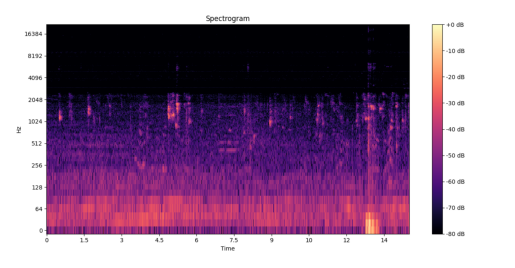

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
model_path = '/content/drive/My Drive/Colab Notebooks/model.keras'  # Update this to the path of your .keras file
model = load_model(model_path)

# Define a function to preprocess the spectrogram image
# def preprocess_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (600, 1200))  # Resize to the required input size
#     image = image.astype('float32') / 255  # Normalize pixel values
#     return image


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1200, 600))  # Resize to the required input size

    # If the image has 3 channels (RGB), add an alpha channel
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

    image = image.astype('float32') / 255  # Normalize pixel values
    return image



# Define a function to make predictions on the spectrogram image
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    print(preprocessed_image.shape)
    prediction = model.predict(preprocessed_image[np.newaxis, ...])
    return prediction

predict_image(image_path)
# Make predictions on a spectrogram image
  # Update this to the path of your image
prediction = predict_image(image_path)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Healthy Chicken")
else:
    print("Unhealthy Chicken")


# Display the spectrogram image
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
